# Смирнов Сергей Артёмович, ФПэ-01-22

## Домашнее задание №1
### Задача 1:

Построить график зависимости термического КПД от давления промежуточного перегрева водяного пара для условий примера: $P_0$0
=12 М $t_0$t
0
=5 $p_k$ 
Р
к
=5 кПа. Параметры промп $p_{\text{п.п.}}$Р
п
.
п
.
=1, 2, 3$t_{\text{п.п.}}$Па; 
t
п
.
п
.
=530 °С.:

In [1]:
import iapws
from iapws import IAPWS97 as gas
import numpy as np

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [3]:
p_0 = 12 * MPa
t_0 = 530
p_k = 5 * kPa
p_middle = {"Pпп = 1МПа": 1 * MPa,"Pпп = 2 МПа": 2 * MPa,"Pпп = 3 МПа": 3 * MPa, "Pпп = 4 МПа": 4 * MPa,"Pпп = 5 МПа": 5 * MPa,"Pпп = 6 МПа": 6 * MPa}
t_middle = 530

In [4]:
t_0 = to_kelvin(530)
t_middle = to_kelvin(t_middle)

In [5]:
def efficiency(p0: float,p_middle:float, t_middle: float , t_0: float, pk: float) -> float:
    point_0_start = gas(P=p0 * unit, T=t_0)
    point_0_end = gas(P=p_middle * unit, s=point_0_start.s)
    point_1_start = gas(P=p_middle * unit, T=t_middle)
    point_condenser = gas(P=pk * unit, s=point_1_start.s)
    point_pump = gas(P=pk * unit, x=0) # ок, понял
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    efficiency = useful_energy / full_energy
    return efficiency
def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k

In [6]:
efficiency_dict = {}
for i in p_middle.values():
    j = get_key(p_middle, i)
    efficiency_dict[j] = efficiency_dict.get(j, []) + [efficiency(p_0, i, t_middle, t_0, p_k)]

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Vait_\AppData\Local\Temp\ipykernel_18768\3221289679.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Зависимость $\eta$ от $p_{pp}$', fontsize=16)
C:\Users\Vait_\AppData\Local\Temp\ipykernel_18768\3221289679.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$\eta$')


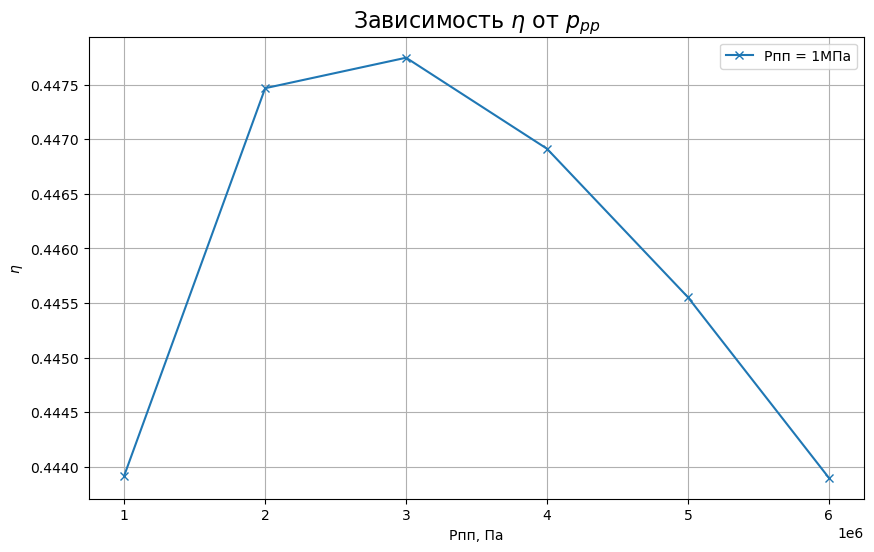

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title('Зависимость $\eta$ от $p_{pp}$', fontsize=16)
plt.xlabel('Pпп, Па')
plt.ylabel('$\eta$')
plt.plot(p_middle.values(),efficiency_dict.values(), marker='x')
plt.grid(True)
plt.legend(efficiency_dict.keys())
plt.show()

# Задача 2

Построить график изолиний термического КПД от давления промежуточного перегрева и начальной температуры для $Р_0$=12 МПа; $t_0$=530 °С; $Р_к$=5 кПа.. Графиком покрыть множество максимумов КПД. Для отрисовки прочитать [документацию](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)

In [8]:
def to_kelvin_dict(t_0):
    for i,j in t_0.items():
        j = int(to_kelvin(j))
        t_0[i] = j
    return t_0

In [9]:
p_0 = 12 * MPa
t_0 = 530
p_k = 5 * kPa
p_middle = {"Pпп = 1 МПа": 1 * MPa,"Pпп = 2 МПа": 2 * MPa,"Pпп = 3 МПа": 3 * MPa, "Pпп = 4 МПа": 4 * MPa,"Pпп = 5 МПа": 5 * MPa}
t_middle = {"t_0 = 530 $°C$": 530, "t_1 = 580 $°C$": 550, "t_2 = 630 $°C$": 570, "t_3 = 680 $°C$": 590, "t_4 = 530 $°C$": 610}

for i in t_middle.values():
    i = to_kelvin(i)

In [10]:
t_middle = to_kelvin_dict(t_middle)
# t_middle

In [11]:
efficiency_dict = {}

# eff_curr
for i in p_middle.values():
    eff_curr = []
    for j in t_middle.values():
        eff_curr.append(efficiency(p_0, i, t_0, j, p_k))
    efficiency_dict[str(i)] = efficiency_dict.get(j, []) + eff_curr
# efficiency_dict

<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Vait_\AppData\Local\Temp\ipykernel_18768\752181902.py:14: SyntaxWarning: invalid escape sequence '\e'
  cbar.ax.set_ylabel('$\eta$')


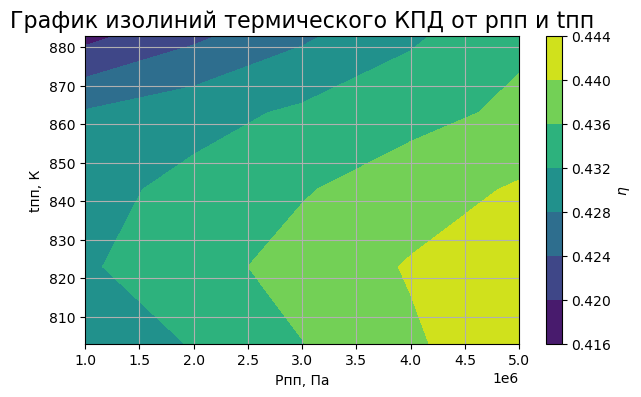

In [12]:
# fig, ax = plt.subplots(1, 2)

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

# ax.contour(p_middle.values(), t_middle.values(), efficiency_dict.values())
CS = ax.contourf(p_middle.values(), t_middle.values(), efficiency_dict.values())
plt.title('График изолиний термического КПД от pпп и tпп', fontsize=16)
plt.xlabel('Pпп, Па')
plt.ylabel('tпп, К')
plt.grid(True)

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('$\eta$')

plt.show()

# Задача 3

При удельных расходах водяного пара $d_{01}$= 2,9 кг/(кВт·ч) и $d_{02}$= 3,4 кг/(кВт·ч) оценить удельные расходы теплоты на выработку электроэнергии, приняв разность энтальпий $h_0$ – $h_{п.в.}$ = 2400 кДж/кг.

In [34]:
# !pip install handcalcs

In [35]:
# import handcalcs.render

In [13]:
# %%render

kW = 10**3

d_01 = 3 # kg/(kW $\cdot$ h)
d_02 = 3.4 # kg/(kW $\cdot$ h)
Delta_h_0 = 2400 # kW

N_1 = Delta_h_0 * kW #kW

mass_flow_first = d_01 * N_1 / 3600 #kg/s
mass_flow_second = d_02 * N_1 / 3600#kg/s

print(
    "Ответ на задачу 3:\n",
    round(mass_flow_first, 0), "Кг/c Для первой турбины\n",
    round(mass_flow_second, 3), "Кг/c Для второй турбины"
)

Ответ на задачу 3:
 2000.0 Кг/c Для первой турбины
 2266.667 Кг/c Для второй турбины


# Задача 4

Написать код для решения задачи оптимизации параметров промежуточного перегрева $P_{п.п.}$ и $t_{п.п.}$ для свободных начальных параметров $Р_0$, $t_0$, $Р_к$. Сделаем допущение, что начальная точка процесса расширения всегда находится в зоне перегретого пара. Решение должно выдавать параметры промежуточного перегрева и термический КПД при них. На основе этого кода собрать информацию об оптимальных давлениях промежуточного перегрева и температуры при $P_0$ от 5 до 12 МПа с шагом 1 МПа и температурой $t_0$ = 500 °С, $Р_к$=5 кПа. Сделать график функции оптимального давления промежуточного перегрева от давления $P_0$


In [16]:
t_0 = to_kelvin(500)
p_k = 5 * kPa
p_0 = {}
for i in range(5,13):
    curr_p = "p_0 = " + str(i) + " MPa"
    p_0[curr_p] = i * MPa


In [17]:
from scipy.optimize import minimize

def error_2(x):
    p_iter = iapws.iapws97._P23_T(x[0]) * 1000 
    v = gas(P=p_iter * unit, T=float(to_kelvin(x[0]))).v  
    v_2 = gas(P=x[1] * unit, T=float(to_kelvin(x[0]))).v 
    eta = efficiency(x[1], p_iter, x[0], t_0, p_k)
    return abs(eta) 

def minimizer (t, p):
    result = minimize(error_2, [t,p], method='BFGS')
    return result.x[0], result.x[1], (1-result.fun)

p_curr = 0
t_curr = 0
eta_curr = 0
p_predict = []
t_predict = []
eta_predict = []
for i in p_0.values():
    j = get_key(p_0, i)
    p_curr, t_curr, eta_curr = minimizer(t_0, p_0[j])
    p_0[j] = [p_0[j], p_curr, t_curr, eta_curr]
    # p_0[j] = t_curr
    # p_0[j] = eta_curr
# p_0

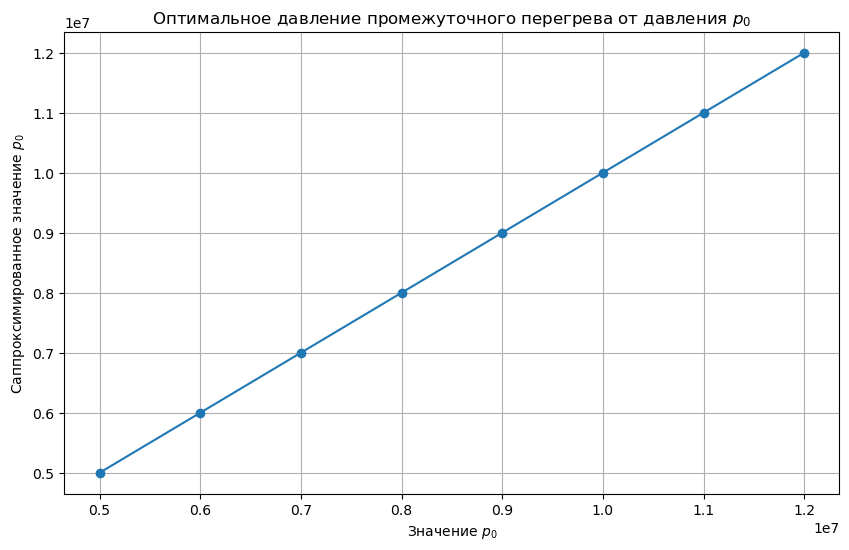

In [18]:
p_0